In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import string
import seaborn as sns
from sklearn.metrics import confusion_matrix
from nltk.tokenize import sent_tokenize
from nltk.corpus  import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Conv1D, MaxPooling1D, Flatten




In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/nlp project/sentiment analysis/IMDB Dataset.csv.zip')

In [4]:

data.head()
data.shape
data.info()
data.tail()
data.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [5]:
# removing urls

def remove_urls(text):

  # Improved regular expression for robust URL matching
  pattern = re.compile(r'https?://(?:www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
  return pattern.sub('', text)

remove_urls =data['review'].apply(remove_urls)

print(remove_urls )

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


In [6]:
 # removing punctuation marks
exclude = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('','',exclude))
remove_punct = data['review'].apply(lambda x: remove_punctuation(x))

print(remove_punct )


0        One of the other reviewers has mentioned that ...
1        A wonderful little production br br The filmin...
2        I thought this was a wonderful way to spend ti...
3        Basically theres a family where a little boy J...
4        Petter Matteis Love in the Time of Money is a ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


In [7]:
# lower casing

lower_case = data['review'].str.lower()
print(lower_case)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object


In [8]:
# tokenization

nltk.download('punkt_tab')

sentences = lower_case.apply(sent_tokenize)
words = lower_case.apply(nltk.word_tokenize)
print(words)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0        [one, of, the, other, reviewers, has, mentione...
1        [a, wonderful, little, production, ., <, br, /...
2        [i, thought, this, was, a, wonderful, way, to,...
3        [basically, there, 's, a, family, where, a, li...
4        [petter, mattei, 's, ``, love, in, the, time, ...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot, ,, bad, dialogue, ,, bad, acting, ...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [i, 'm, going, to, have, to, disagree, with, t...
49999    [no, one, expects, the, star, trek, movies, to...
Name: review, Length: 50000, dtype: object


In [9]:
# stop words removal

nltk.download('stopwords')

def stopwords_removal(sentences):
    stop_words = set(stopwords.words('english'))
    filtered_text = []
    for word_list in words:  # Access each list of words
        filtered_list = [word for word in word_list if word.lower() not in stop_words]
        filtered_text.extend(filtered_list)  # Extend filtered_text with the filtered list
    return ' '.join(filtered_text)

stopwords_removed_text = stopwords_removal(sentences)


print(stopwords_removed_text)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# remove html tags
def remove_html_tags(text):
  return re.sub(r'<.*?>', '', text)


text_without_html = remove_html_tags(stopwords_removed_text)
print(text_without_html)

In [11]:
# Multinomial Naive Bayes Model
print("**Multinomial Naive Bayes Model**")
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)
y_pred_nb = model_nb.predict(X_test_vec)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb:.2f}')
print(classification_report(y_test, y_pred_nb))

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# Logistic Regression Model
print("\n**Logistic Regression Model**")
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_vec, y_train)
y_pred_lr = model_lr.predict(X_test_vec)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr:.2f}')
print(classification_report(y_test, y_pred_lr))



**Logistic Regression Model**
Accuracy: 0.90
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [13]:
# Model Comparison
print("\n**Model Comparison**")
if accuracy_nb > accuracy_lr:
    print("Multinomial Naive Bayes achieved a higher accuracy.")
elif accuracy_lr > accuracy_nb:
    print("Logistic Regression achieved a higher accuracy.")
else:
    print("Both models achieved the same accuracy.")



**Model Comparison**
Logistic Regression achieved a higher accuracy.


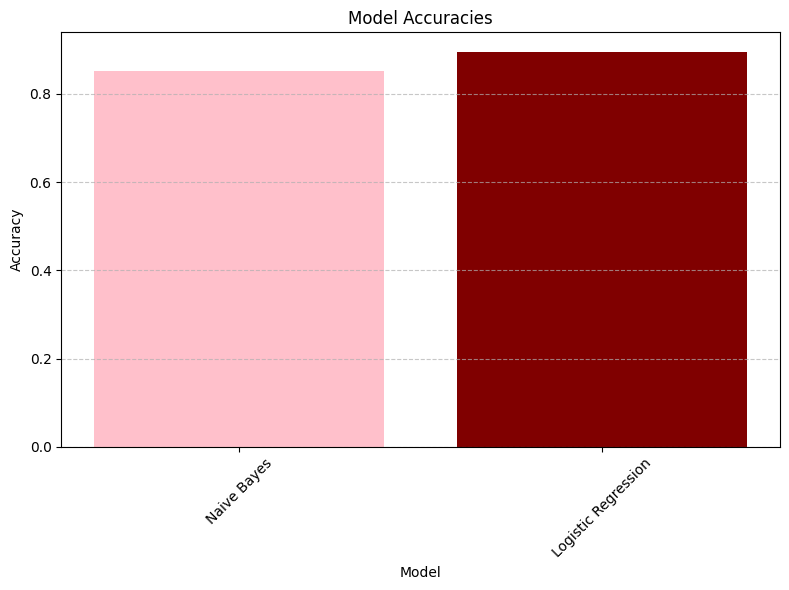

In [14]:
# Visualize model accuracies
models = ['Naive Bayes', 'Logistic Regression']
accuracies = [accuracy_nb, accuracy_lr]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['pink', 'maroon'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

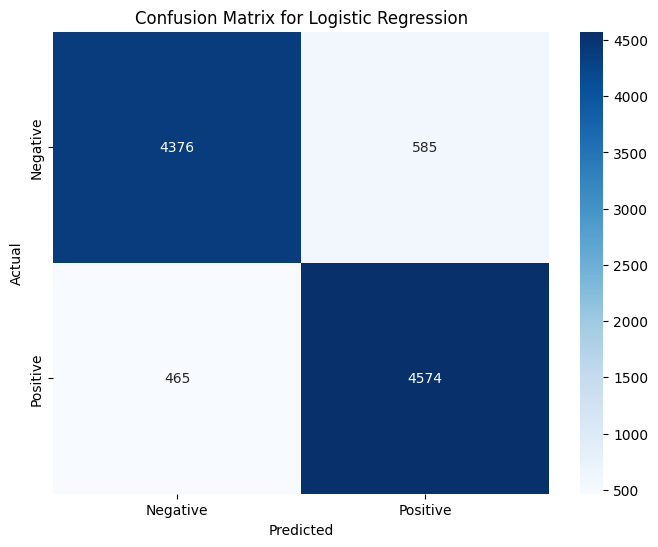

In [15]:
# Confusion Matrix for Logistic Regression (example)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

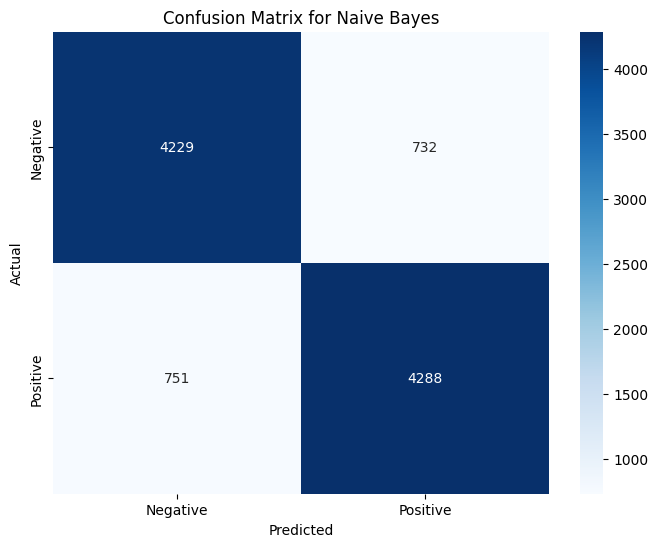

In [16]:
# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Convert labels to numerical values
y_train = y_train.map({'negative': 0, 'positive': 1})
y_test = y_test.map({'negative': 0, 'positive': 1})

# Tokenization for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_length = 100  # Adjust as needed
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Build and train the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(5000, 128))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate the LSTM model
y_pred_lstm = model_lstm.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"\n**LSTM Model**")
print(f'Accuracy: {accuracy_lstm:.2f}')
print(classification_report(y_test, y_pred_lstm))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 251s 199ms/step - accuracy: 0.6235 - loss: 0.6382 - val_accuracy: 0.7984 - val_loss: 0.4776
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 256s 194ms/step - accuracy: 0.8036 - loss: 0.4575 - val_accuracy: 0.8215 - val_loss: 0.4424
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 257s 191ms/step - accuracy: 0.8529 - loss: 0.3534 - val_accuracy: 0.8411 - val_loss: 0.3685
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 260s 189ms/step - accuracy: 0.8899 - loss: 0.2785 - val_accuracy: 0.8353 - val_loss: 0.3742
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 264s 191ms/step - accuracy: 0.9052 - loss: 0.2389 - val_accuracy: 0.8385 - val_loss: 0.3748
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step

**LSTM Model**
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4961
           1       0.83      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84

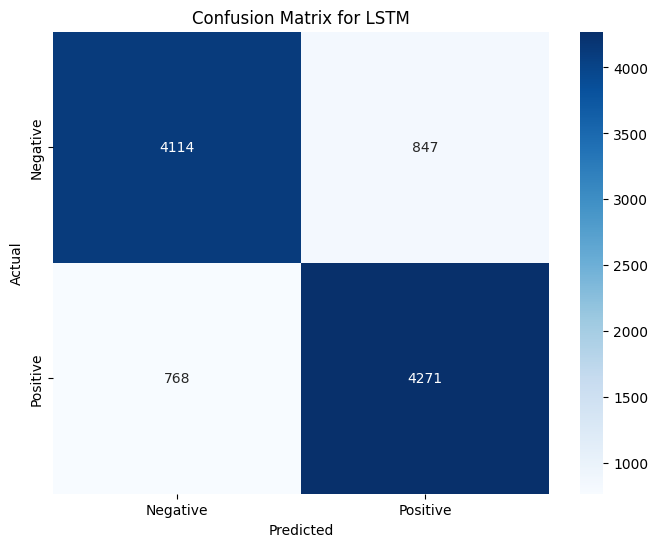

In [18]:
# Confusion Matrix for LSTM
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LSTM')
plt.show()


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.7136 - loss: 0.5179 - val_accuracy: 0.8472 - val_loss: 0.3542
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8783 - loss: 0.2889 - val_accuracy: 0.8433 - val_loss: 0.3570
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9329 - loss: 0.1823 - val_accuracy: 0.8325 - val_loss: 0.4105
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.9855 - loss: 0.0670 - val_accuracy: 0.8277 - val_loss: 0.5436
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9980 - loss: 0.0177 - val_accuracy: 0.8230 - val_loss: 0.6705
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

**CNN Model**
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      4961
           1       0.84      0.81      0.82      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
we

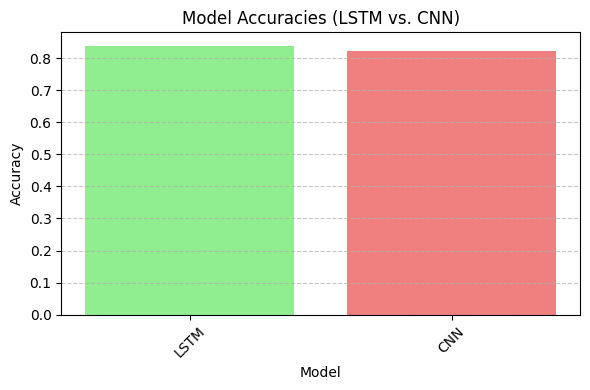


LSTM achieved the highest accuracy.


In [19]:
# Build and train the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(5000, 128))
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))


y_pred_cnn = model_cnn.predict(X_test_pad)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"\n**CNN Model**")
print(f'Accuracy: {accuracy_cnn:.2f}')
print(classification_report(y_test, y_pred_cnn))


models = ['LSTM', 'CNN']
accuracies = [accuracy_lstm, accuracy_cnn]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['lightgreen', 'lightcoral'])
plt.title('Model Accuracies (LSTM vs. CNN)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


if accuracy_lstm and accuracy_lstm > accuracy_cnn:
    print("\nLSTM achieved the highest accuracy.")
elif  accuracy_lstm and  accuracy_cnn:
    print("\nGRU achieved the highest accuracy.")
elif accuracy_cnn > accuracy_lstm and accuracy_cnn :
    print("\nCNN achieved the highest accuracy.")
else:
    print("\nOne or more models have the same highest accuracy.")

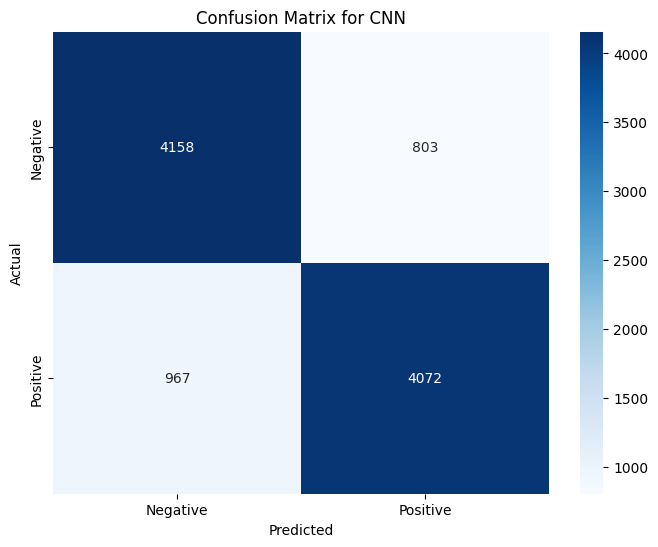

In [21]:
# Confusion Matrix for CNN
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN')
plt.show()